In [28]:
import numpy as np
from matplotlib import pyplot as plt

In [137]:
class bak_model():

    def __init__(self, layer_sizes: list) -> None:

        '''
        Layer_sizes is a list of how many neurons are in each layer, with the first being inputs and last being outputs.
        
        The model is initialized by creating random weight matrices for each layer.
        
        '''

        self.layer_sizes = layer_sizes
        self.layers = []
        
        
        for i in range(len(layer_sizes) - 1):
            self.layers.append(np.random.random((layer_sizes[i], layer_sizes[i+1])))




    def learn_configuration(self, configuration: list, depressions: int, max_delta: float):

        '''
        Depressions is the number of training steps the model takes(either successful(no update) or not)

        The model takes a random input node activates the network according to the Winner-Takes-All rule and records which synapses were used through this activation and then checks if the correct output node was reached. If the wrong node was reached it reduces the activated synapses and distributes the reduced magnitude to the rest of the weights for that layer.

        '''

        if(len(configuration) != self.layer_sizes[0]):
            raise Exception('Different number of inputs in model and in configuration')
        
        i = 0
        while i<depressions:
            active_weights = []
            input_node = np.random.randint(0,self.layer_sizes[0])
            layer = 0
            current_node = input_node
            
            while layer<len(self.layers):
                new_node = np.argmax(self.layers[layer][current_node,:])
                active_weights.append((current_node, new_node))
                current_node = new_node
                
                layer += 1
            
            if(current_node != configuration[input_node]):
                delta = np.random.random()*max_delta
                for k in range(len(self.layers)):
                    temp_delta = np.max([delta, self.layers[k][active_weights[k]]])
                    self.layers[k] += temp_delta/(self.layers[k].shape[0]*self.layers[k].shape[1])
                    self.layers[k][active_weights[k]] -= temp_delta

            i += 1
        

    def test_configuration(self, configuration: list):
        '''
        Given a configuration the test runs through all of the input neurons and counts how many of the neurons are sent to the wrong one.
        '''

        if(len(configuration) != self.layer_sizes[0]):
            raise Exception('Different number of inputs in model and in configuration')
        error = 0

        for i in range(self.layer_sizes[0]):
            layer = 0
            current_node = i
            
            while layer<len(self.layers):
                new_node = np.argmax(self.layers[layer][current_node,:])
                current_node = new_node
                
                layer += 1

            if(current_node != configuration[i]):
                error += 1

        return error
            

        


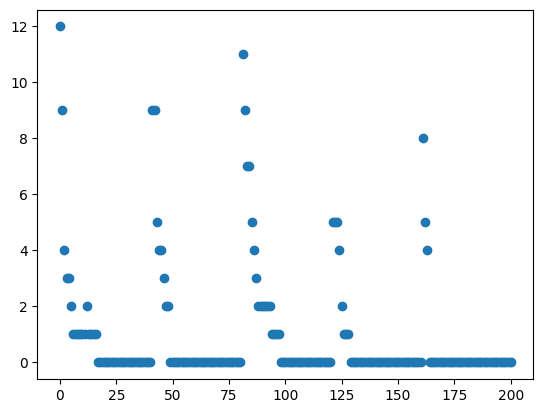

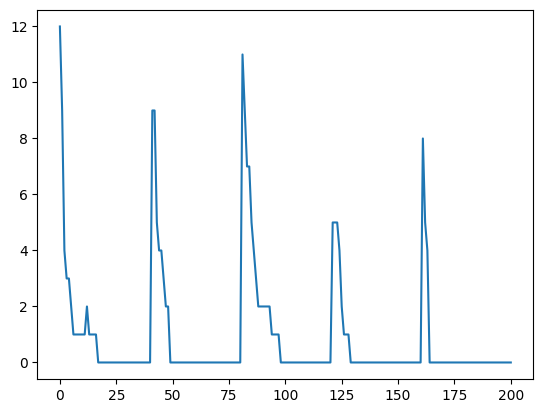

In [156]:
plt.scatter(list(range(len(error_progress))) ,error_progress)
plt.figure(2)
plt.plot(error_progress)
plt.show()

[22, 3, 46, 29, 9, 37, 33, 9, 15, 32, 37, 8, 23, 31, 40, 3, 32, 18, 25, 3, 3, 38, 5, 8, 41, 25, 7, 41, 3, 43, 35, 1, 47, 46, 4, 3, 13, 48, 2, 9, 1, 26, 23, 38, 21, 39, 17, 10, 19, 33]
48


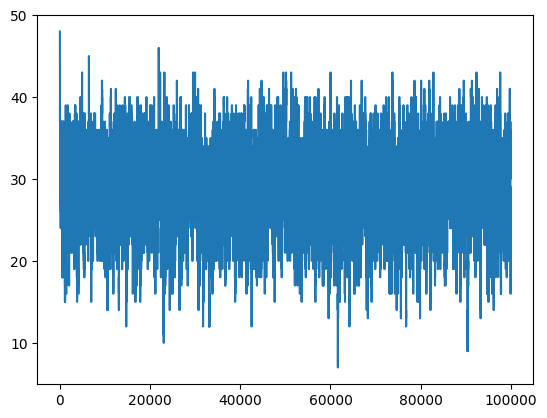

In [227]:
input_size = 50
output_size = input_size

model = bak_model([input_size, 1000,  output_size])

number_generator = np.random.default_rng(seed=42)

config = list(np.random.randint(0, high=output_size, size=(input_size)))
print(config)

#configs = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 3, 2, 3, 4, 5, 4, 5, 6, 7, 6, 7]]
#config = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

error_progress = [model.test_configuration(config)]

print(model.test_configuration(config))


#config_index = 0
#config = configs[config_index]

i=0

initial_weights = np.copy(model.layers[0])

while i<100000:
    model.learn_configuration(config, 50, 1.0)
    error_progress.append(model.test_configuration(config))
    #print(model.test_configuration(config))
    i+=1
    if i%1000 == 0:
        #config_index = (config_index + 1)%3
        print(i)
        #config = configs[config_index]
        #print(config)


final_weights = np.copy(model.layers[0])


plt.plot(error_progress)


(50000,)
(array([1.74358607e+00, 1.71776668e+00, 1.42924285e+00, 1.07741487e+00,
       7.88268884e-01, 5.55116742e-01, 3.51050290e-01, 9.58116875e-02,
       1.69536915e-02, 1.71092299e-03]), array([6.79292490e-06, 1.28592358e-01, 2.57177923e-01, 3.85763489e-01,
       5.14349054e-01, 6.42934619e-01, 7.71520185e-01, 9.00105750e-01,
       1.02869132e+00, 1.15727688e+00, 1.28586245e+00]))


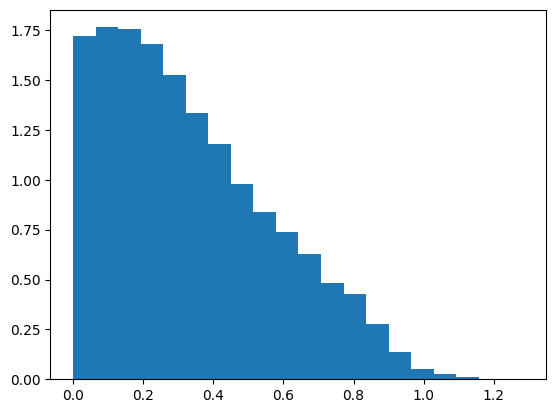

In [229]:
dW = np.abs((final_weights - initial_weights).flatten())
print(dW.shape)

den = np.histogram(dW, bins=10, density=True)
print(den)
plt.hist(dW, bins=20, density=True, cumulative=False)
plt.show()